In [1]:
import pandas as pd 
import numpy as np 
import datetime as dt 
import matplotlib.pyplot as plt 

In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler

In [3]:
import os
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from matplotlib import rc
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras import Input,callbacks, layers
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM,GRU
from tensorflow.python.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential

In [34]:
print('Enter the cryptocurrency you want to see? ')
crypto = input() 
if crypto == 'BAT'or crypto == 'Basic Authentication Token': 
    df = pd.read_csv(r"D:\6 sem\Minor PRoject - 3\BAT-INR.csv")
    df.head()
elif crypto == 'Bitcoin' or crypto == 'BTC':
    df = pd.read_csv(r"D:\6 sem\Minor PRoject - 3\BTC-INR.csv")
    df.head()
elif crypto == 'Litecoin'or crypto == 'LTC': 
    df = pd.read_csv(r"D:\6 sem\Minor PRoject - 3\LTC-INR.csv")
    df.head()
elif crypto == 'ETH' or crypto == 'Ethereum':
    df = pd.read_csv(r"D:\6 sem\Minor PRoject - 3\ETC-INR.csv")
    df.head()
else:
    print('You can only check prediction for only four cryptocurrencies (BTC, BAT, LTC, and ETC) for now')

Enter the cryptocurrency you want to see? 
LTC


In [35]:
df['TOMORROW_CLOSE'] = df['Close'].shift(-1,fill_value=0)

In [36]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,TOMORROW_CLOSE
726,2022-04-20,8700.664063,8688.542969,8467.331055,8541.414063,8541.414063,51058870819,8163.074219
727,2022-04-21,8541.081055,8699.921875,8109.203613,8163.074219,8163.074219,57006820424,8074.614746
728,2022-04-22,8162.990234,8272.390625,8070.445801,8074.614746,8074.614746,51085178778,8067.360352
729,2022-04-23,8074.724609,8193.074219,8052.887695,8067.360352,8067.360352,38439834004,7963.967285
730,2022-04-24,8069.834473,8099.871094,7963.967285,7963.967285,7963.967285,36203085824,0.000000


In [37]:
df.drop(df.tail(1).index,inplace=True) 

In [38]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,TOMORROW_CLOSE
0,2020-04-24,3267.357178,3453.421631,3263.935791,3419.843994,3419.843994,365303793975,3411.837158
1,2020-04-25,3420.206787,3483.746338,3385.536133,3411.837158,3411.837158,363949529900,3408.950684
2,2020-04-26,3412.219238,3458.602539,3380.233887,3408.950684,3408.950684,357597992713,3406.316650
3,2020-04-27,3408.061523,3464.648193,3342.229004,3406.316650,3406.316650,340839165282,3501.481689
4,2020-04-28,3408.458008,3522.198242,3368.484131,3501.481689,3501.481689,335740664879,3701.807617
...,...,...,...,...,...,...,...,...
725,2022-04-19,8484.605469,8714.016602,8479.778320,8700.438477,8700.438477,49974952857,8541.414063
726,2022-04-20,8700.664063,8688.542969,8467.331055,8541.414063,8541.414063,51058870819,8163.074219
727,2022-04-21,8541.081055,8699.921875,8109.203613,8163.074219,8163.074219,57006820424,8074.614746
728,2022-04-22,8162.990234,8272.390625,8070.445801,8074.614746,8074.614746,51085178778,8067.360352


In [39]:
df.dtypes

Date               object
Open              float64
High              float64
Low               float64
Close             float64
Adj Close         float64
Volume              int64
TOMORROW_CLOSE    float64
dtype: object

In [40]:
df['Date'] = df['Date'].astype('datetime64[ns]')

In [41]:
df = df.set_index('Date')

In [42]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,TOMORROW_CLOSE
Date,,,,,,,
2020-04-24,3267.357178,3453.421631,3263.935791,3419.843994,3419.843994,365303793975,3411.837158
2020-04-25,3420.206787,3483.746338,3385.536133,3411.837158,3411.837158,363949529900,3408.950684
2020-04-26,3412.219238,3458.602539,3380.233887,3408.950684,3408.950684,357597992713,3406.316650
2020-04-27,3408.061523,3464.648193,3342.229004,3406.316650,3406.316650,340839165282,3501.481689
2020-04-28,3408.458008,3522.198242,3368.484131,3501.481689,3501.481689,335740664879,3701.807617


#  Split the data into train (60%) and test(40%) 

In [43]:
train_size = int(len(df) * 0.6)
train_dataset, test_dataset = df.iloc[:train_size],df.iloc[train_size:]

In [44]:
train_size

438

In [45]:
train_dataset.tail()

,Open,High,Low,Close,Adj Close,Volume,TOMORROW_CLOSE
Date,,,,,,,
2021-07-01,10719.650391,10719.650391,10020.864258,10257.436523,10257.436523,125355375522,10199.846680
2021-07-02,10236.690430,10348.010742,9793.383789,10199.846680,10199.846680,105688581991,10448.445313
2021-07-03,10198.870117,10533.635742,10051.000977,10448.445313,10448.445313,92097708400,10792.883789
2021-07-04,10451.298828,11014.503906,10211.346680,10792.883789,10792.883789,106632706695,10261.333008
2021-07-05,10788.674805,10788.674805,10025.901367,10261.333008,10261.333008,99455785921,10390.459961


In [46]:
test_dataset.tail()

,Open,High,Low,Close,Adj Close,Volume,TOMORROW_CLOSE
Date,,,,,,,
2022-04-19,8484.605469,8714.016602,8479.778320,8700.438477,8700.438477,49974952857,8541.414063
2022-04-20,8700.664063,8688.542969,8467.331055,8541.414063,8541.414063,51058870819,8163.074219
2022-04-21,8541.081055,8699.921875,8109.203613,8163.074219,8163.074219,57006820424,8074.614746
2022-04-22,8162.990234,8272.390625,8070.445801,8074.614746,8074.614746,51085178778,8067.360352
2022-04-23,8074.724609,8193.074219,8052.887695,8067.360352,8067.360352,38439834004,7963.967285


In [47]:
test_dataset.head()

,Open,High,Low,Close,Adj Close,Volume,TOMORROW_CLOSE
Date,,,,,,,
2021-07-06,10252.297852,10605.657227,10127.418945,10390.459961,10390.459961,112505737996,10278.410156
2021-07-07,10388.555664,10664.996094,10255.454102,10278.410156,10278.410156,119280243457,9886.309570
2021-07-08,10289.413086,10300.932617,9610.564453,9886.309570,9886.309570,123601178695,10024.325195
2021-07-09,9875.969727,10110.878906,9443.012695,10024.325195,10024.325195,117565337734,9980.800781
2021-07-10,10030.265625,10184.719727,9752.501953,9980.800781,9980.800781,96924645400,10000.890625


In [48]:
train_dataset.head()

,Open,High,Low,Close,Adj Close,Volume,TOMORROW_CLOSE
Date,,,,,,,
2020-04-24,3267.357178,3453.421631,3263.935791,3419.843994,3419.843994,365303793975,3411.837158
2020-04-25,3420.206787,3483.746338,3385.536133,3411.837158,3411.837158,363949529900,3408.950684
2020-04-26,3412.219238,3458.602539,3380.233887,3408.950684,3408.950684,357597992713,3406.316650
2020-04-27,3408.061523,3464.648193,3342.229004,3406.316650,3406.316650,340839165282,3501.481689
2020-04-28,3408.458008,3522.198242,3368.484131,3501.481689,3501.481689,335740664879,3701.807617


#  Plot train and test data 

Dimension of train data:  (438, 7)
Dimension of test data:  (292, 7)


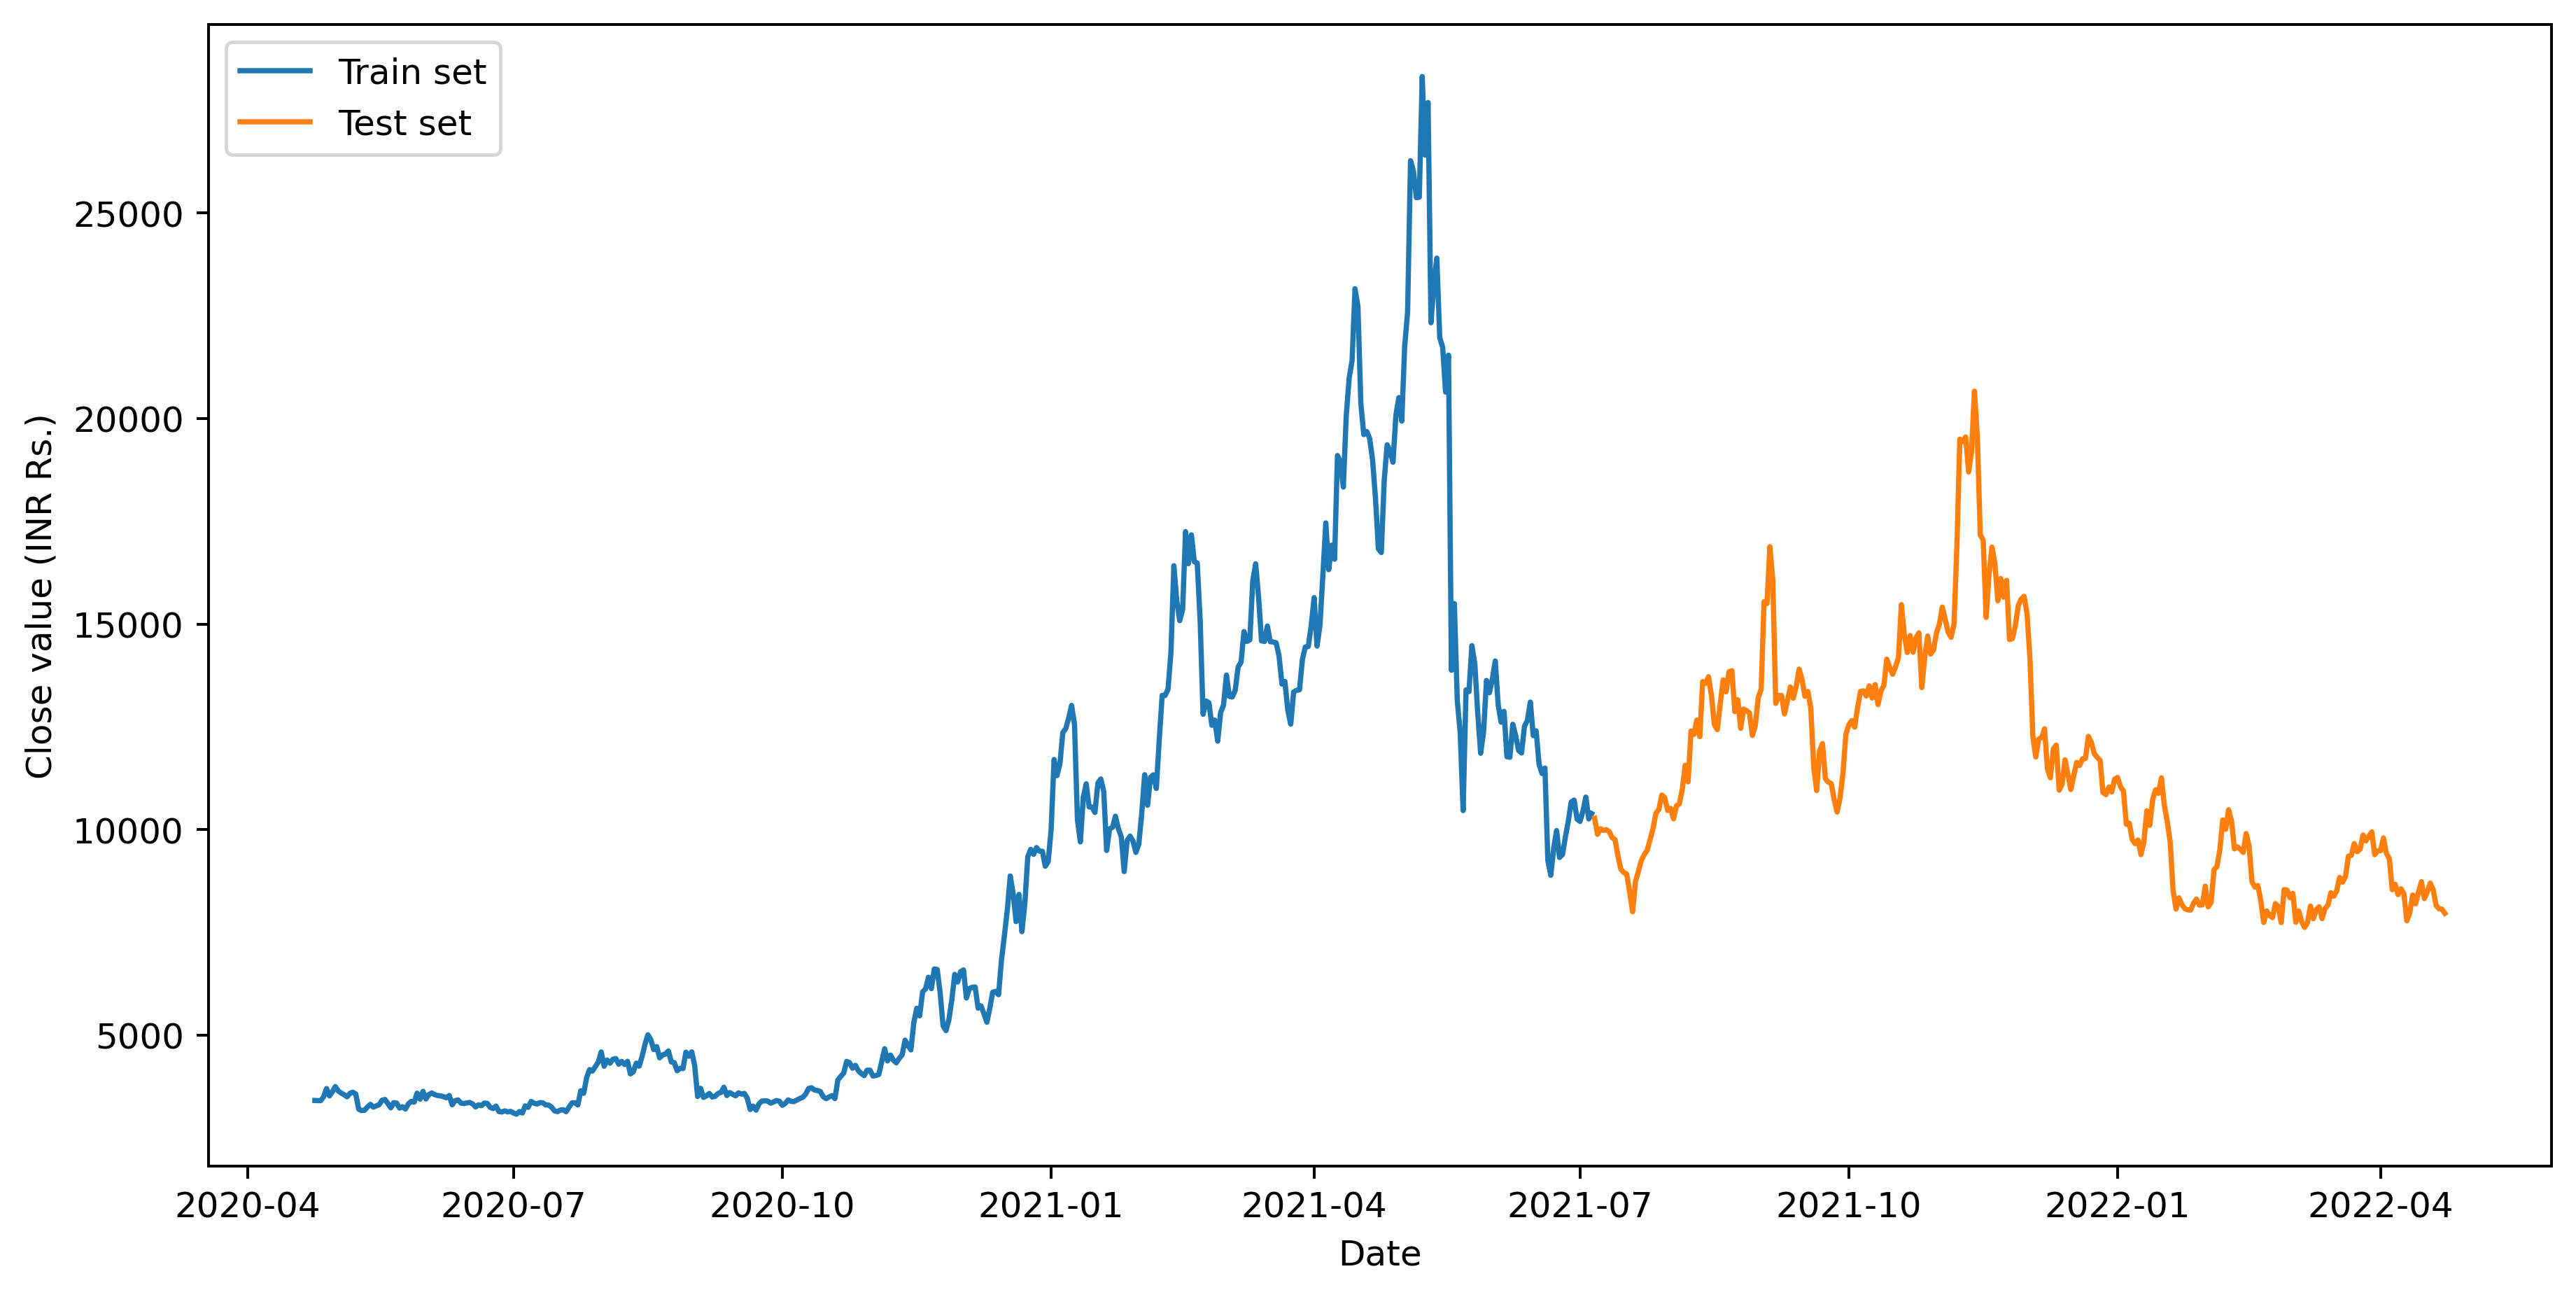

In [49]:
plt.figure(figsize = (12, 6))
plt.rcParams['figure.dpi'] = 360
plt.plot(train_dataset.TOMORROW_CLOSE)
plt.plot(test_dataset.TOMORROW_CLOSE)
plt.xlabel('Date')
plt.ylabel('Close value (INR Rs.)')
plt.legend(['Train set', 'Test set'], loc='upper left')
print('Dimension of train data: ',train_dataset.shape)
print('Dimension of test data: ', test_dataset.shape)

# Split the train data to X and Y 

In [50]:
X_train = train_dataset.drop('TOMORROW_CLOSE', axis = 1)
y_train = train_dataset.loc[:,['TOMORROW_CLOSE']]

# Split test data to X and y
X_test = test_dataset.drop('TOMORROW_CLOSE', axis = 1)
y_test = test_dataset.loc[:,['TOMORROW_CLOSE']]

#  Scale the project 

In [51]:
scaler_x = MinMaxScaler(feature_range = (-1,1))
scaler_y = MinMaxScaler(feature_range = (-1,1))

# Fit the scaler using available training data
input_scaler = scaler_x.fit(X_train)
output_scaler = scaler_y.fit(y_train)

# Apply the scaler to training data
train_y_norm = output_scaler.transform(y_train)
train_x_norm = input_scaler.transform(X_train)

# Apply the scaler to test data
test_y_norm = output_scaler.transform(y_test)
test_x_norm = input_scaler.transform(X_test)

# Create 3D dataset

In [52]:
def threeD_dataset (X, y, time_steps = 1):
    Xs, ys = [], []
    
    for i in range(len(X)-time_steps):
        v = X[i:i+time_steps, :]
        Xs.append(v)
        ys.append(y[i+time_steps])
        
    return np.array(Xs), np.array(ys)


TIME_STEPS = 10

X_test, y_test = threeD_dataset(test_x_norm, test_y_norm, TIME_STEPS)
X_train, y_train = threeD_dataset(train_x_norm, train_y_norm, TIME_STEPS)
print('X_train.shape: ', X_test.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape) 
print('y_test.shape: ', y_train.shape)

X_train.shape:  (282, 10, 6)
y_train.shape:  (428, 1)
X_test.shape:  (282, 10, 6)
y_test.shape:  (428, 1)


#  Build the models

In [53]:
# Create lstm or GRU  model 

def create_model(units, m): 
    model = Sequential()
    # First layer of lstm 
    model.add(m(units = units, return_sequences = True, 
               input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2))
    
    #Second layer of LSTM
    model.add(m(units = units))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    
    #compile model 
    model.compile(loss = 'mape', optimizer = 'adam')
    return model 

# Create Bi - LSTM Model 

def create_model_bilstm(units):
    model = Sequential()
    #first layer of Bi - LSTM 
    model.add(Bidirectional(LSTM(units = units, return_sequences = True), 
                           input_shape = (X_train.shape[1], X_train.shape[2])))
    
    #Second layer of Bi - LSTM 
    model.add(Bidirectional(LSTM(units = units)))
    model.add(Dense(1))
    
    #Compile model 
    model.compile(loss = 'mape', optimizer = 'adam')
    return model 

model_Bi_lstm = create_model_bilstm(64)
model_GRU = create_model(64, GRU)
model_lstm = create_model(64, LSTM)

#  Fit the model 

In [54]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 10)
    
    # set shuffle equal to false due to importance of order for this dataset 
    
    history = model.fit(X_train, y_train, epochs = 100, validation_split = 0.2, 
                       batch_size = 32, shuffle = False, callbacks = [early_stop])
    
    return history 

history_bilstm = fit_model(model_Bi_lstm)
history_lstm = fit_model(model_lstm)
history_gru = fit_model(model_GRU)

Epoch 1/100
11/11 [==============================] - 7s 152ms/step - loss: 77.6253 - val_loss: 81.9944
Epoch 2/100
11/11 [==============================] - 0s 21ms/step - loss: 108.7906 - val_loss: 108.5167
Epoch 3/100
11/11 [==============================] - 0s 25ms/step - loss: 76.3560 - val_loss: 80.6824
Epoch 4/100
11/11 [==============================] - 0s 16ms/step - loss: 33.8885 - val_loss: 91.5816
Epoch 5/100
11/11 [==============================] - 0s 14ms/step - loss: 55.5136 - val_loss: 96.6568
Epoch 6/100
11/11 [==============================] - 0s 16ms/step - loss: 29.3973 - val_loss: 76.1843
Epoch 7/100
11/11 [==============================] - 0s 26ms/step - loss: 35.7050 - val_loss: 74.1375
Epoch 8/100
11/11 [==============================] - 0s 19ms/step - loss: 35.0227 - val_loss: 78.0621
Epoch 9/100
11/11 [==============================] - 0s 22ms/step - loss: 30.3863 - val_loss: 68.1444
Epoch 10/100
11/11 [==============================] - 0s 27ms/step - loss: 26.8

#  must inverse scalar_y to make predictions

In [55]:
y_test = scaler_y.inverse_transform(y_test)
y_train = scaler_y.inverse_transform(y_train)

In [58]:
def prediction(model):
    pred = model.predict(X_test)
    pred = scaler_y.inverse_transform(pred)
    return pred 

pred_lstm = prediction(model_lstm)
pred_bilstm = prediction(model_Bi_lstm)
pred_gru = prediction(model_GRU)


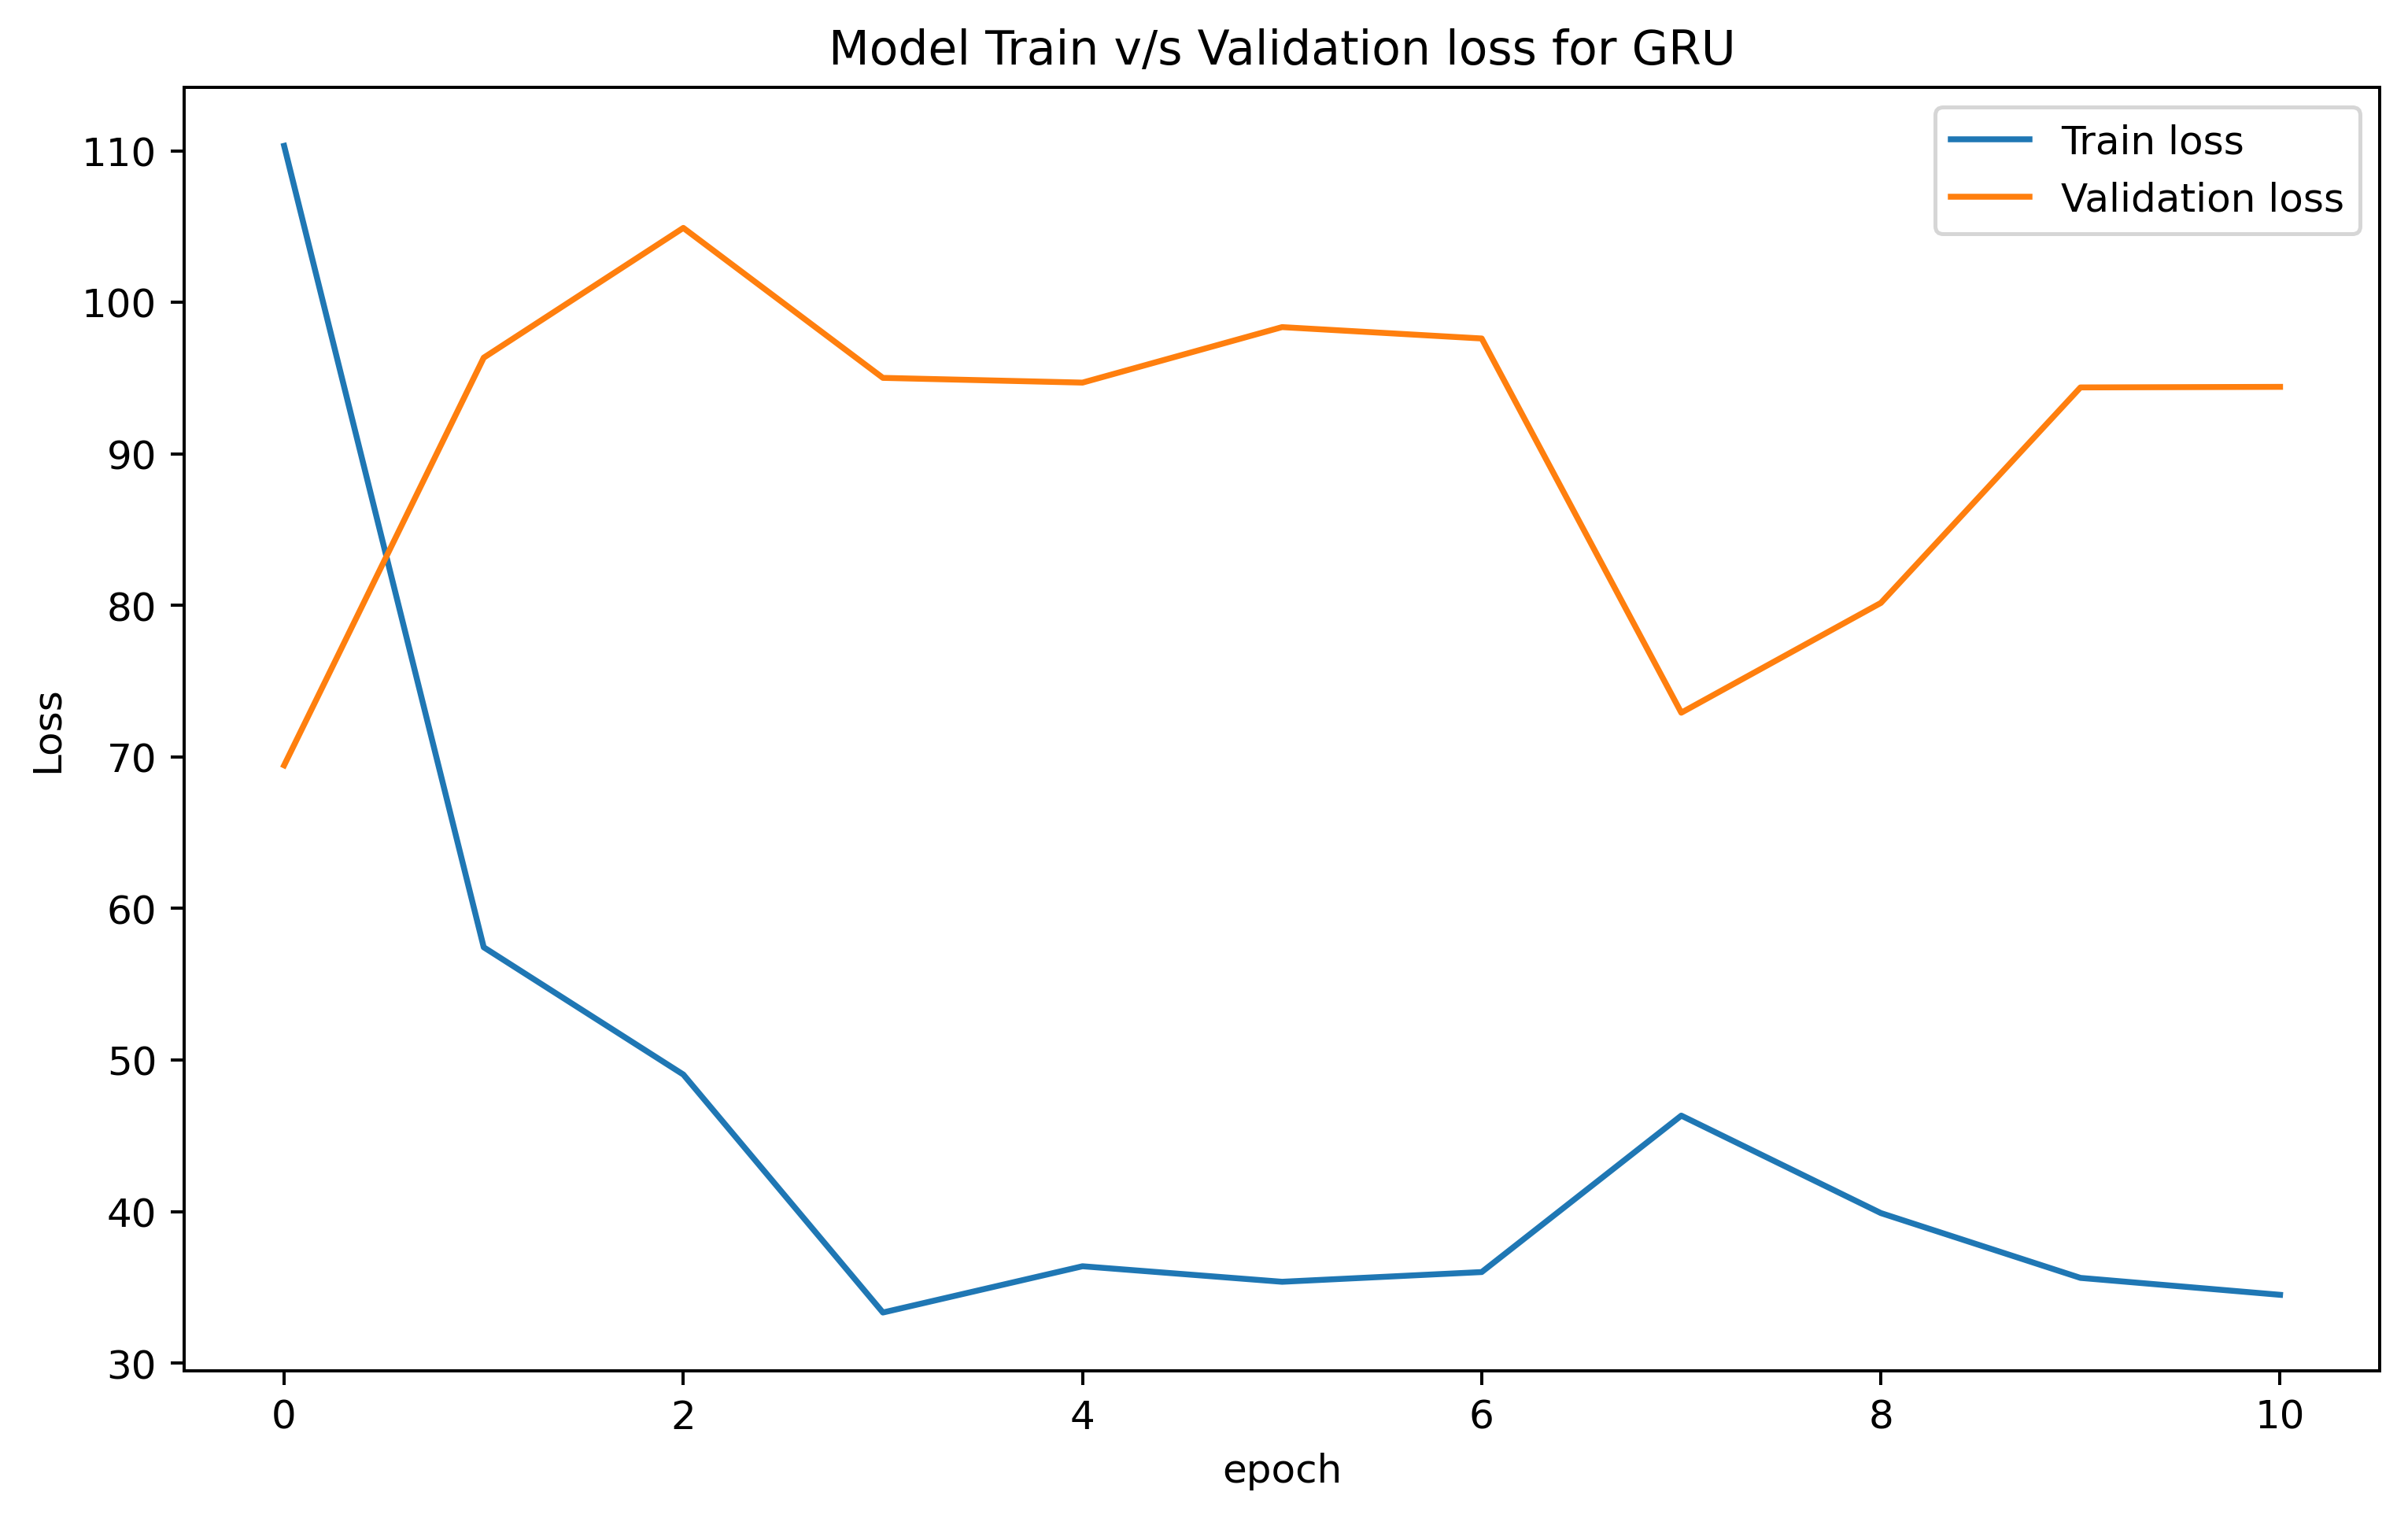

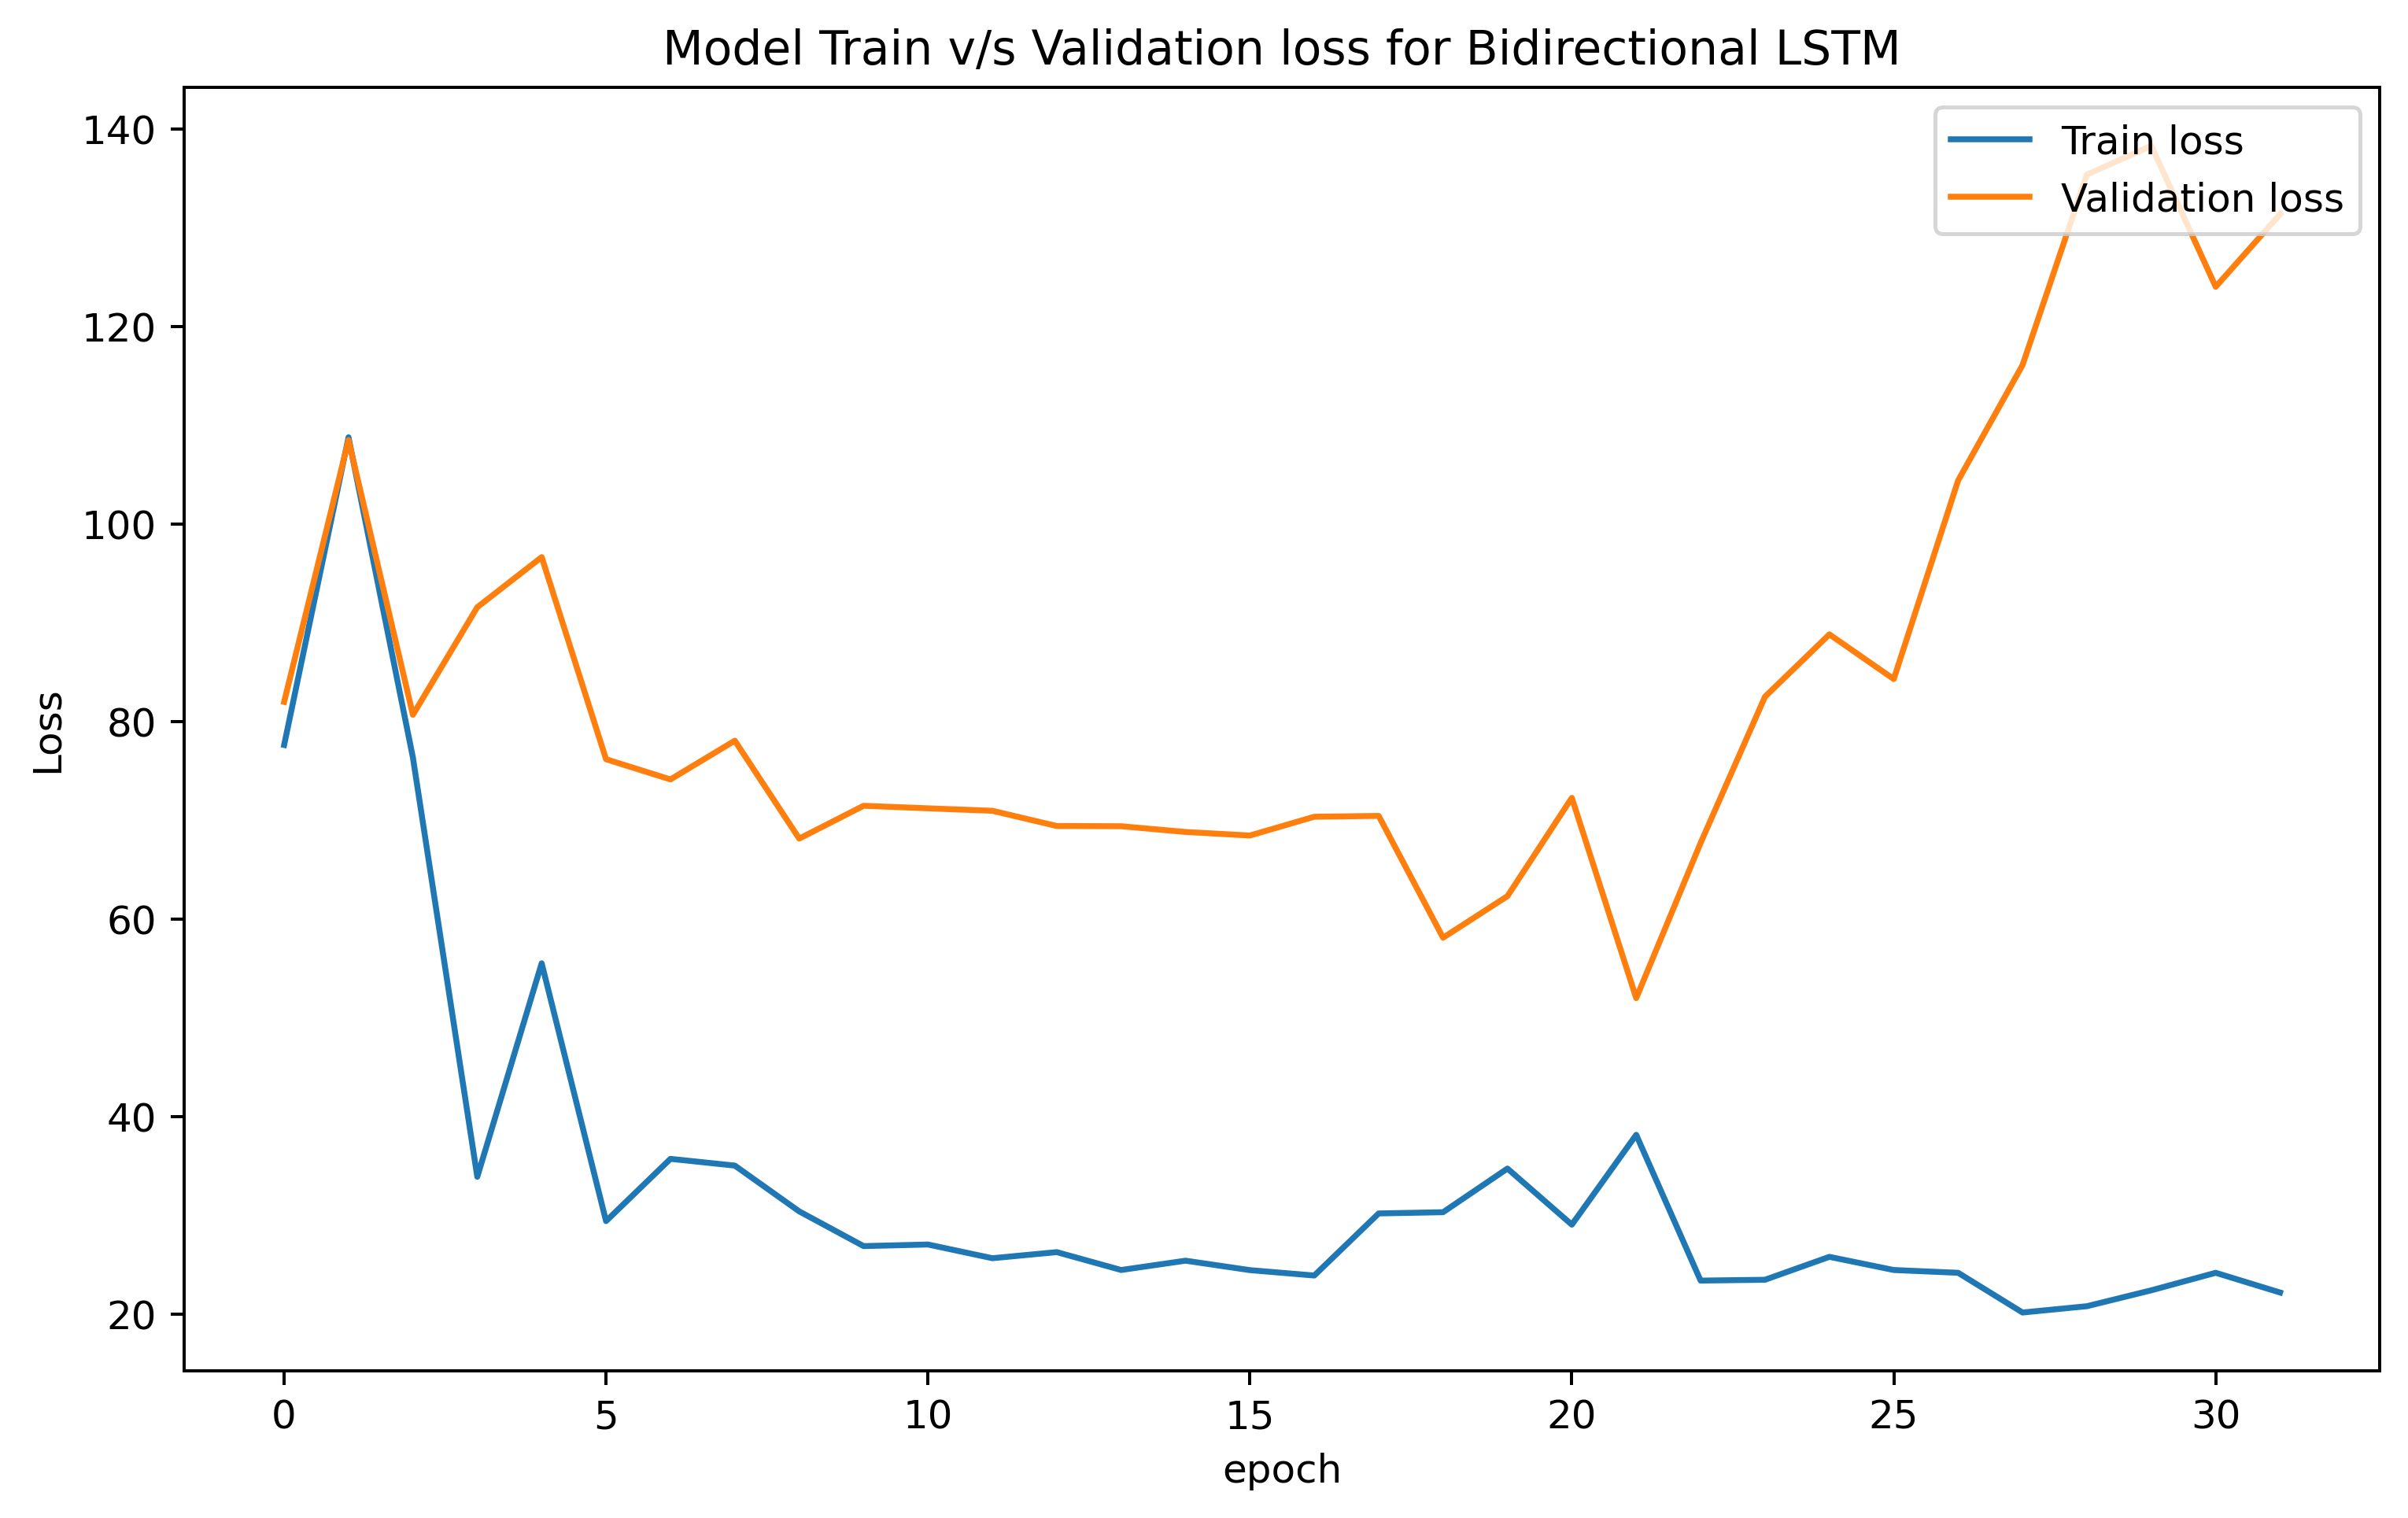

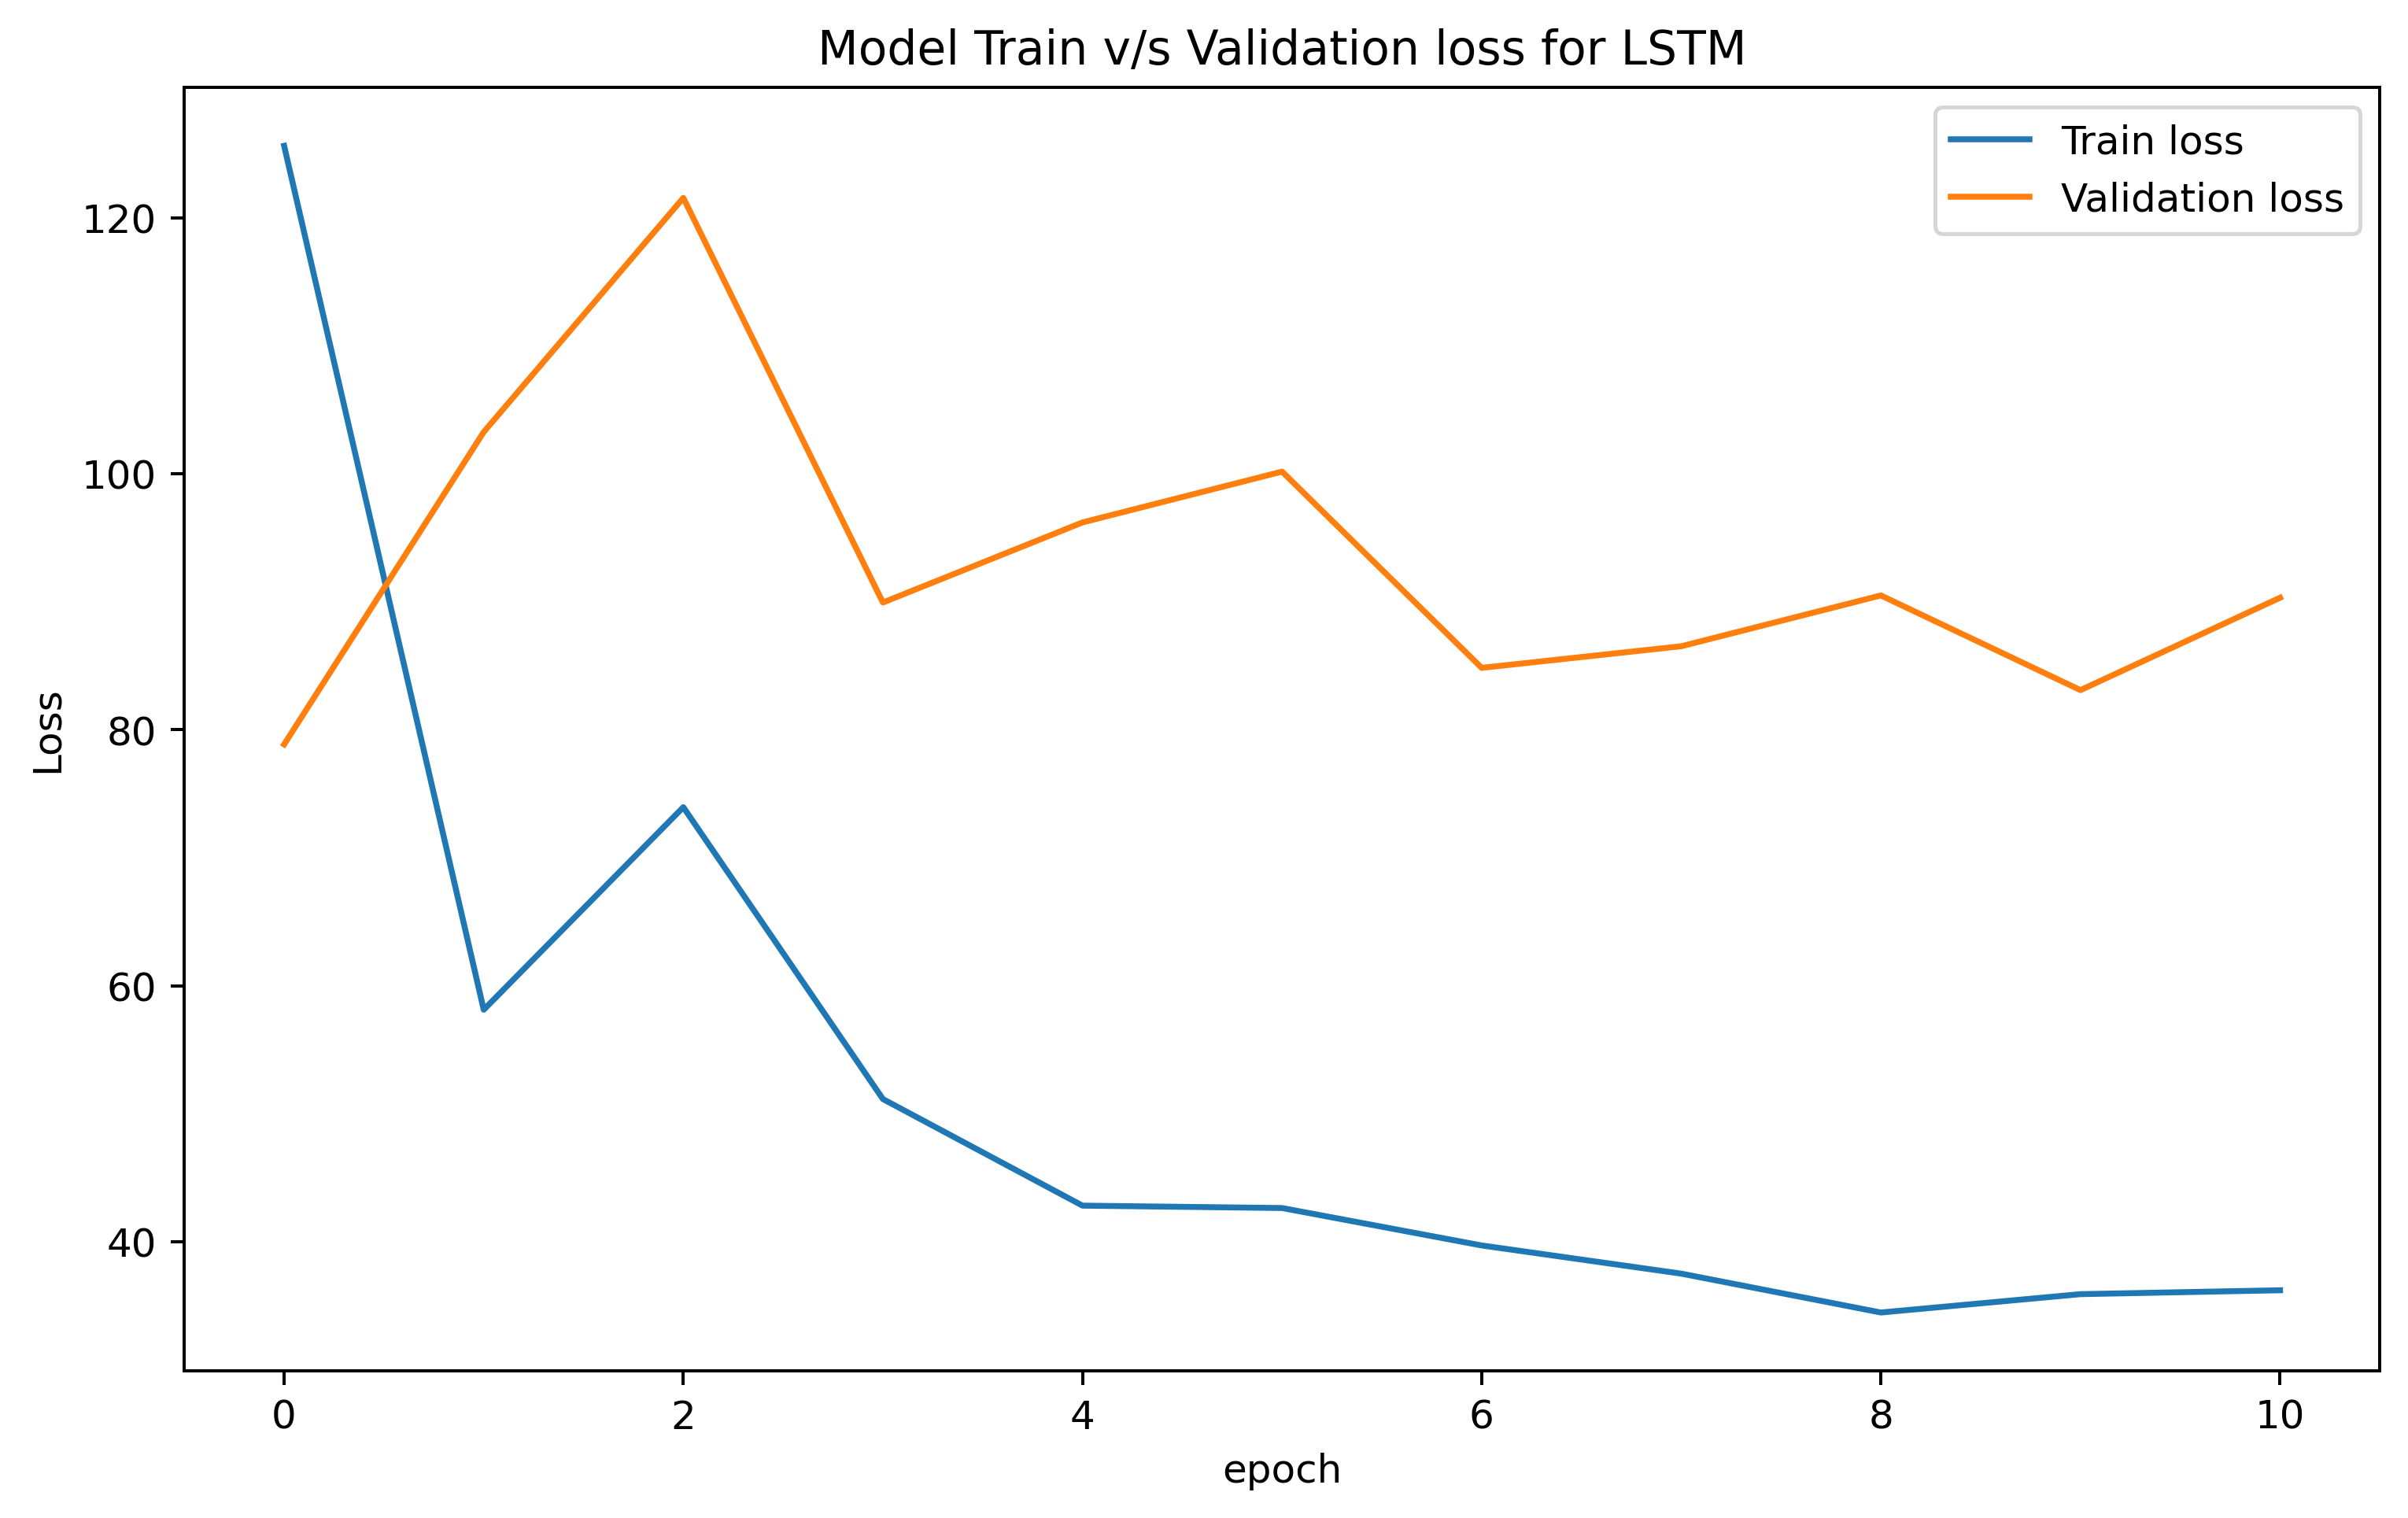

In [59]:
def plt_loss(history, model_name): 
    plt.figure(figsize = (10,6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train v/s Validation loss for '+ model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc = 'upper right')

plt_loss(history_gru, 'GRU')
plt_loss(history_bilstm, 'Bidirectional LSTM')
plt_loss(history_lstm, 'LSTM')

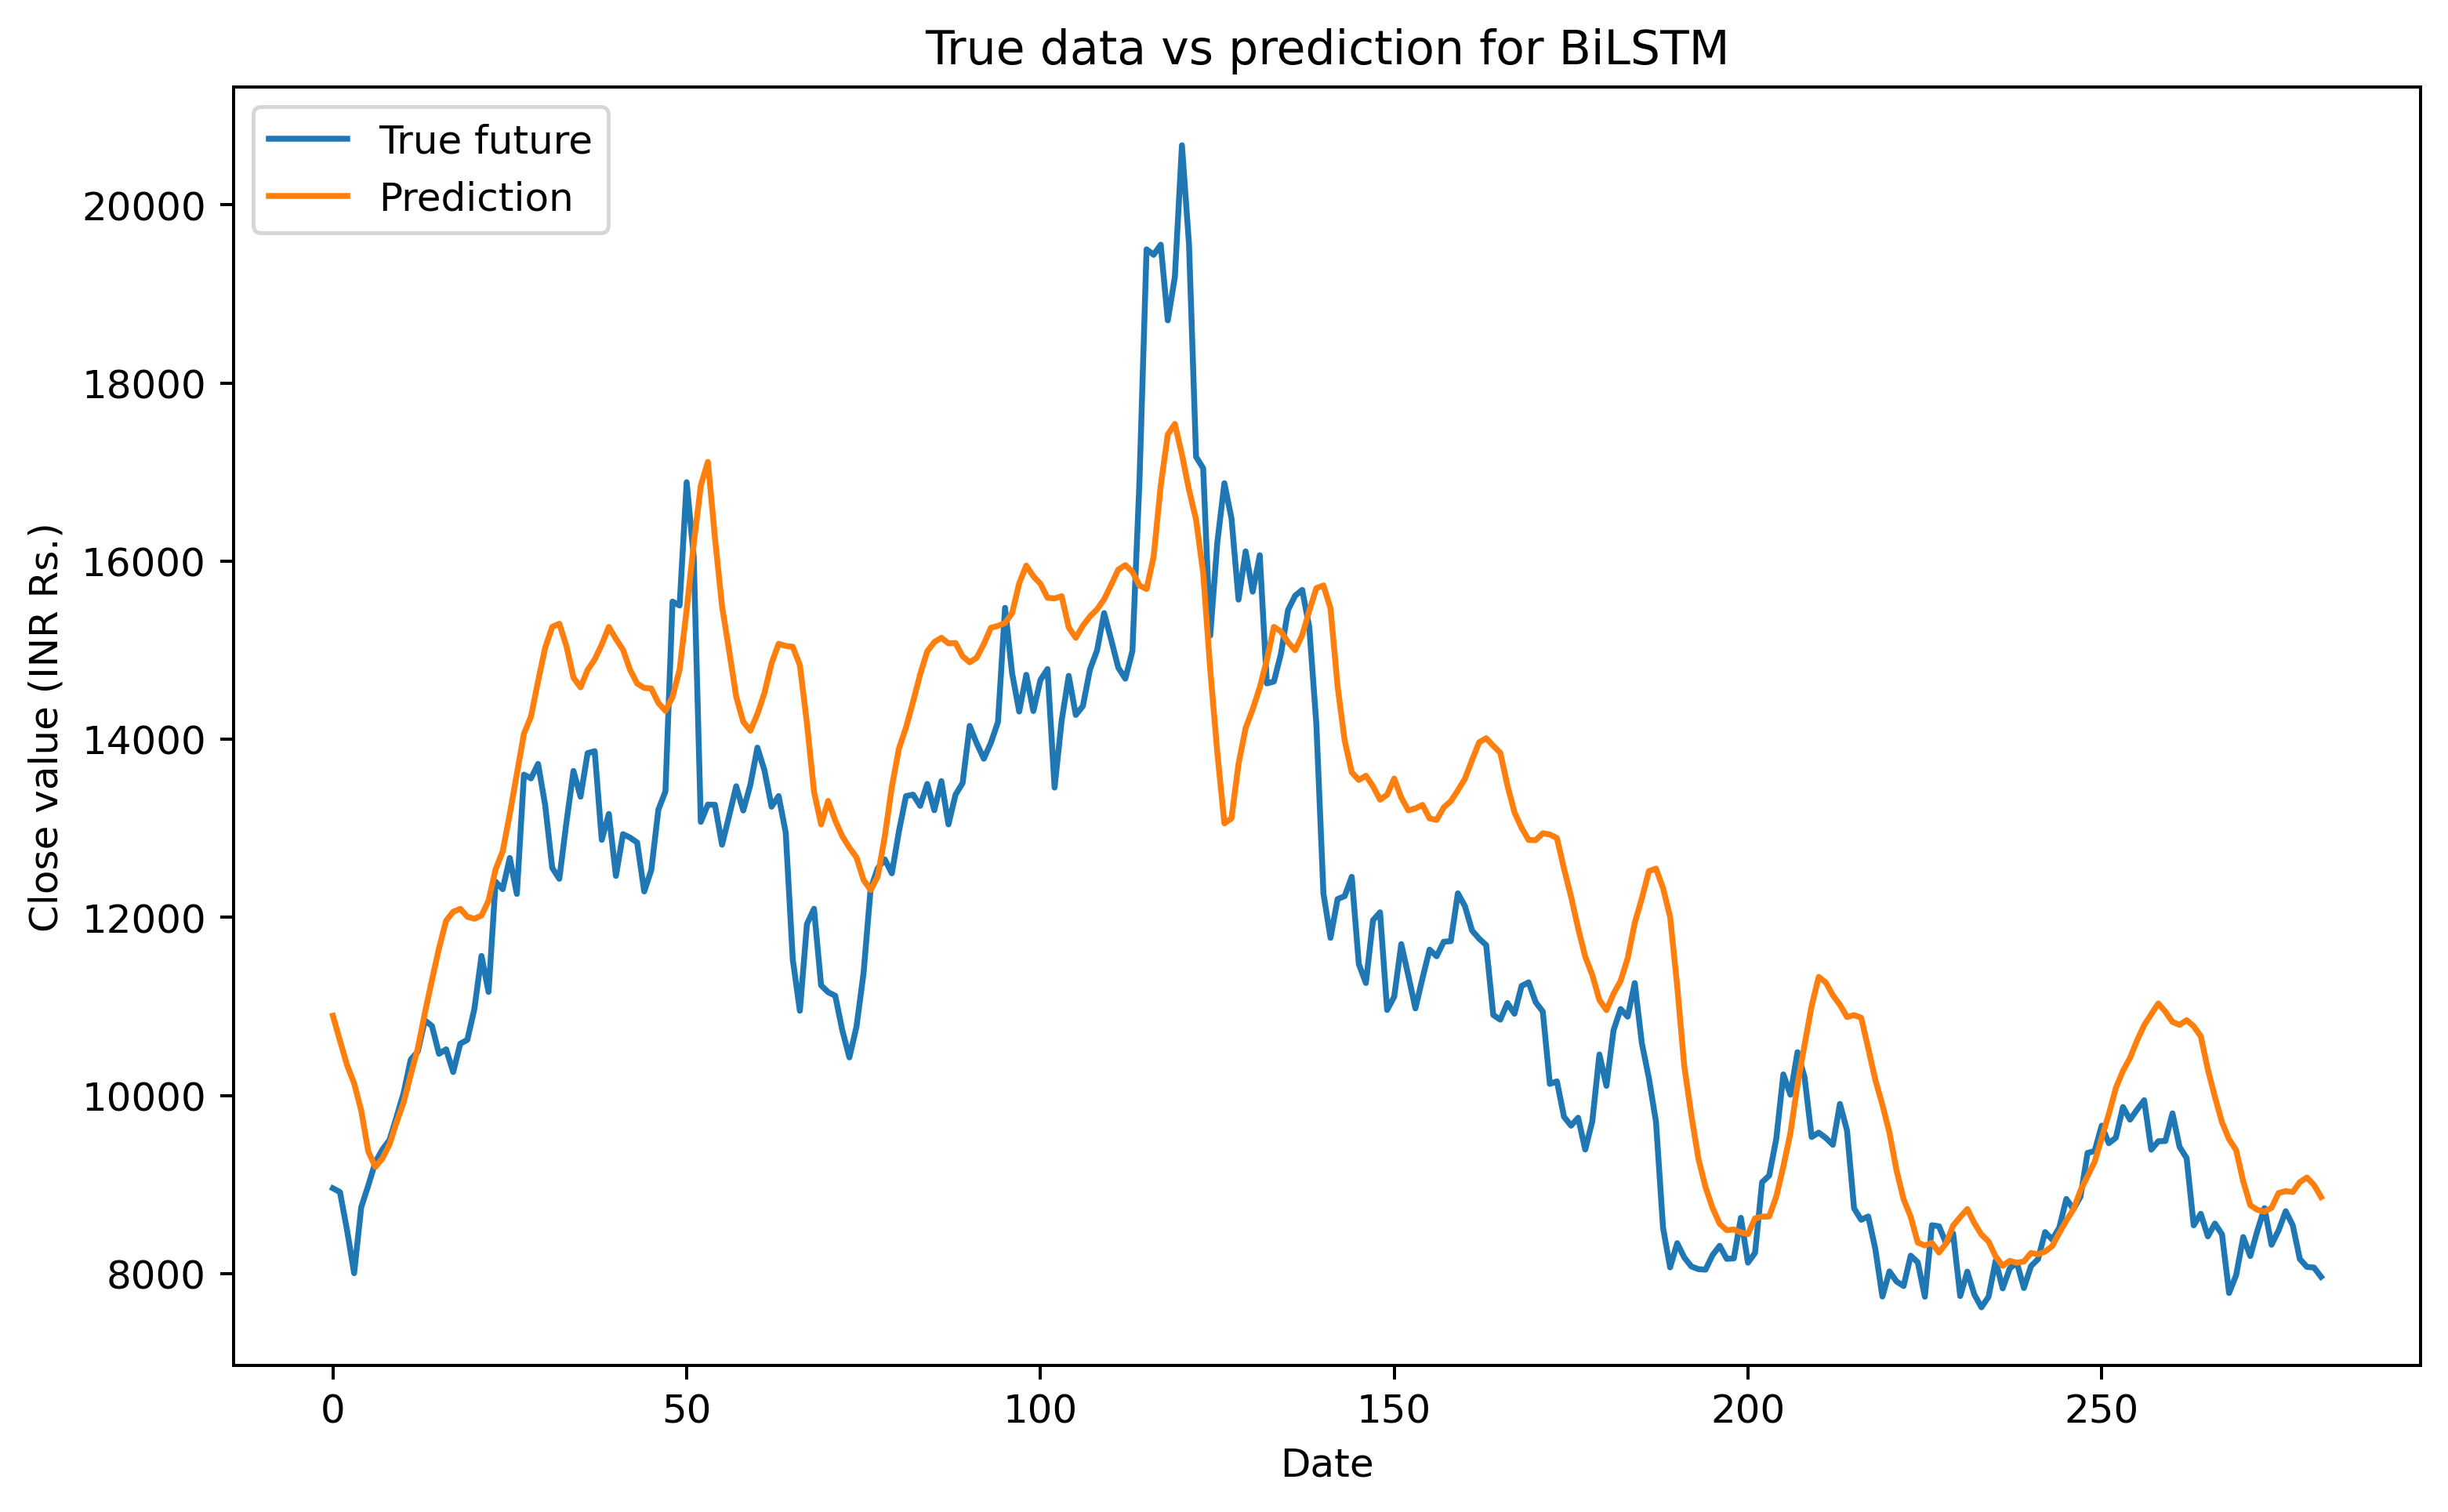

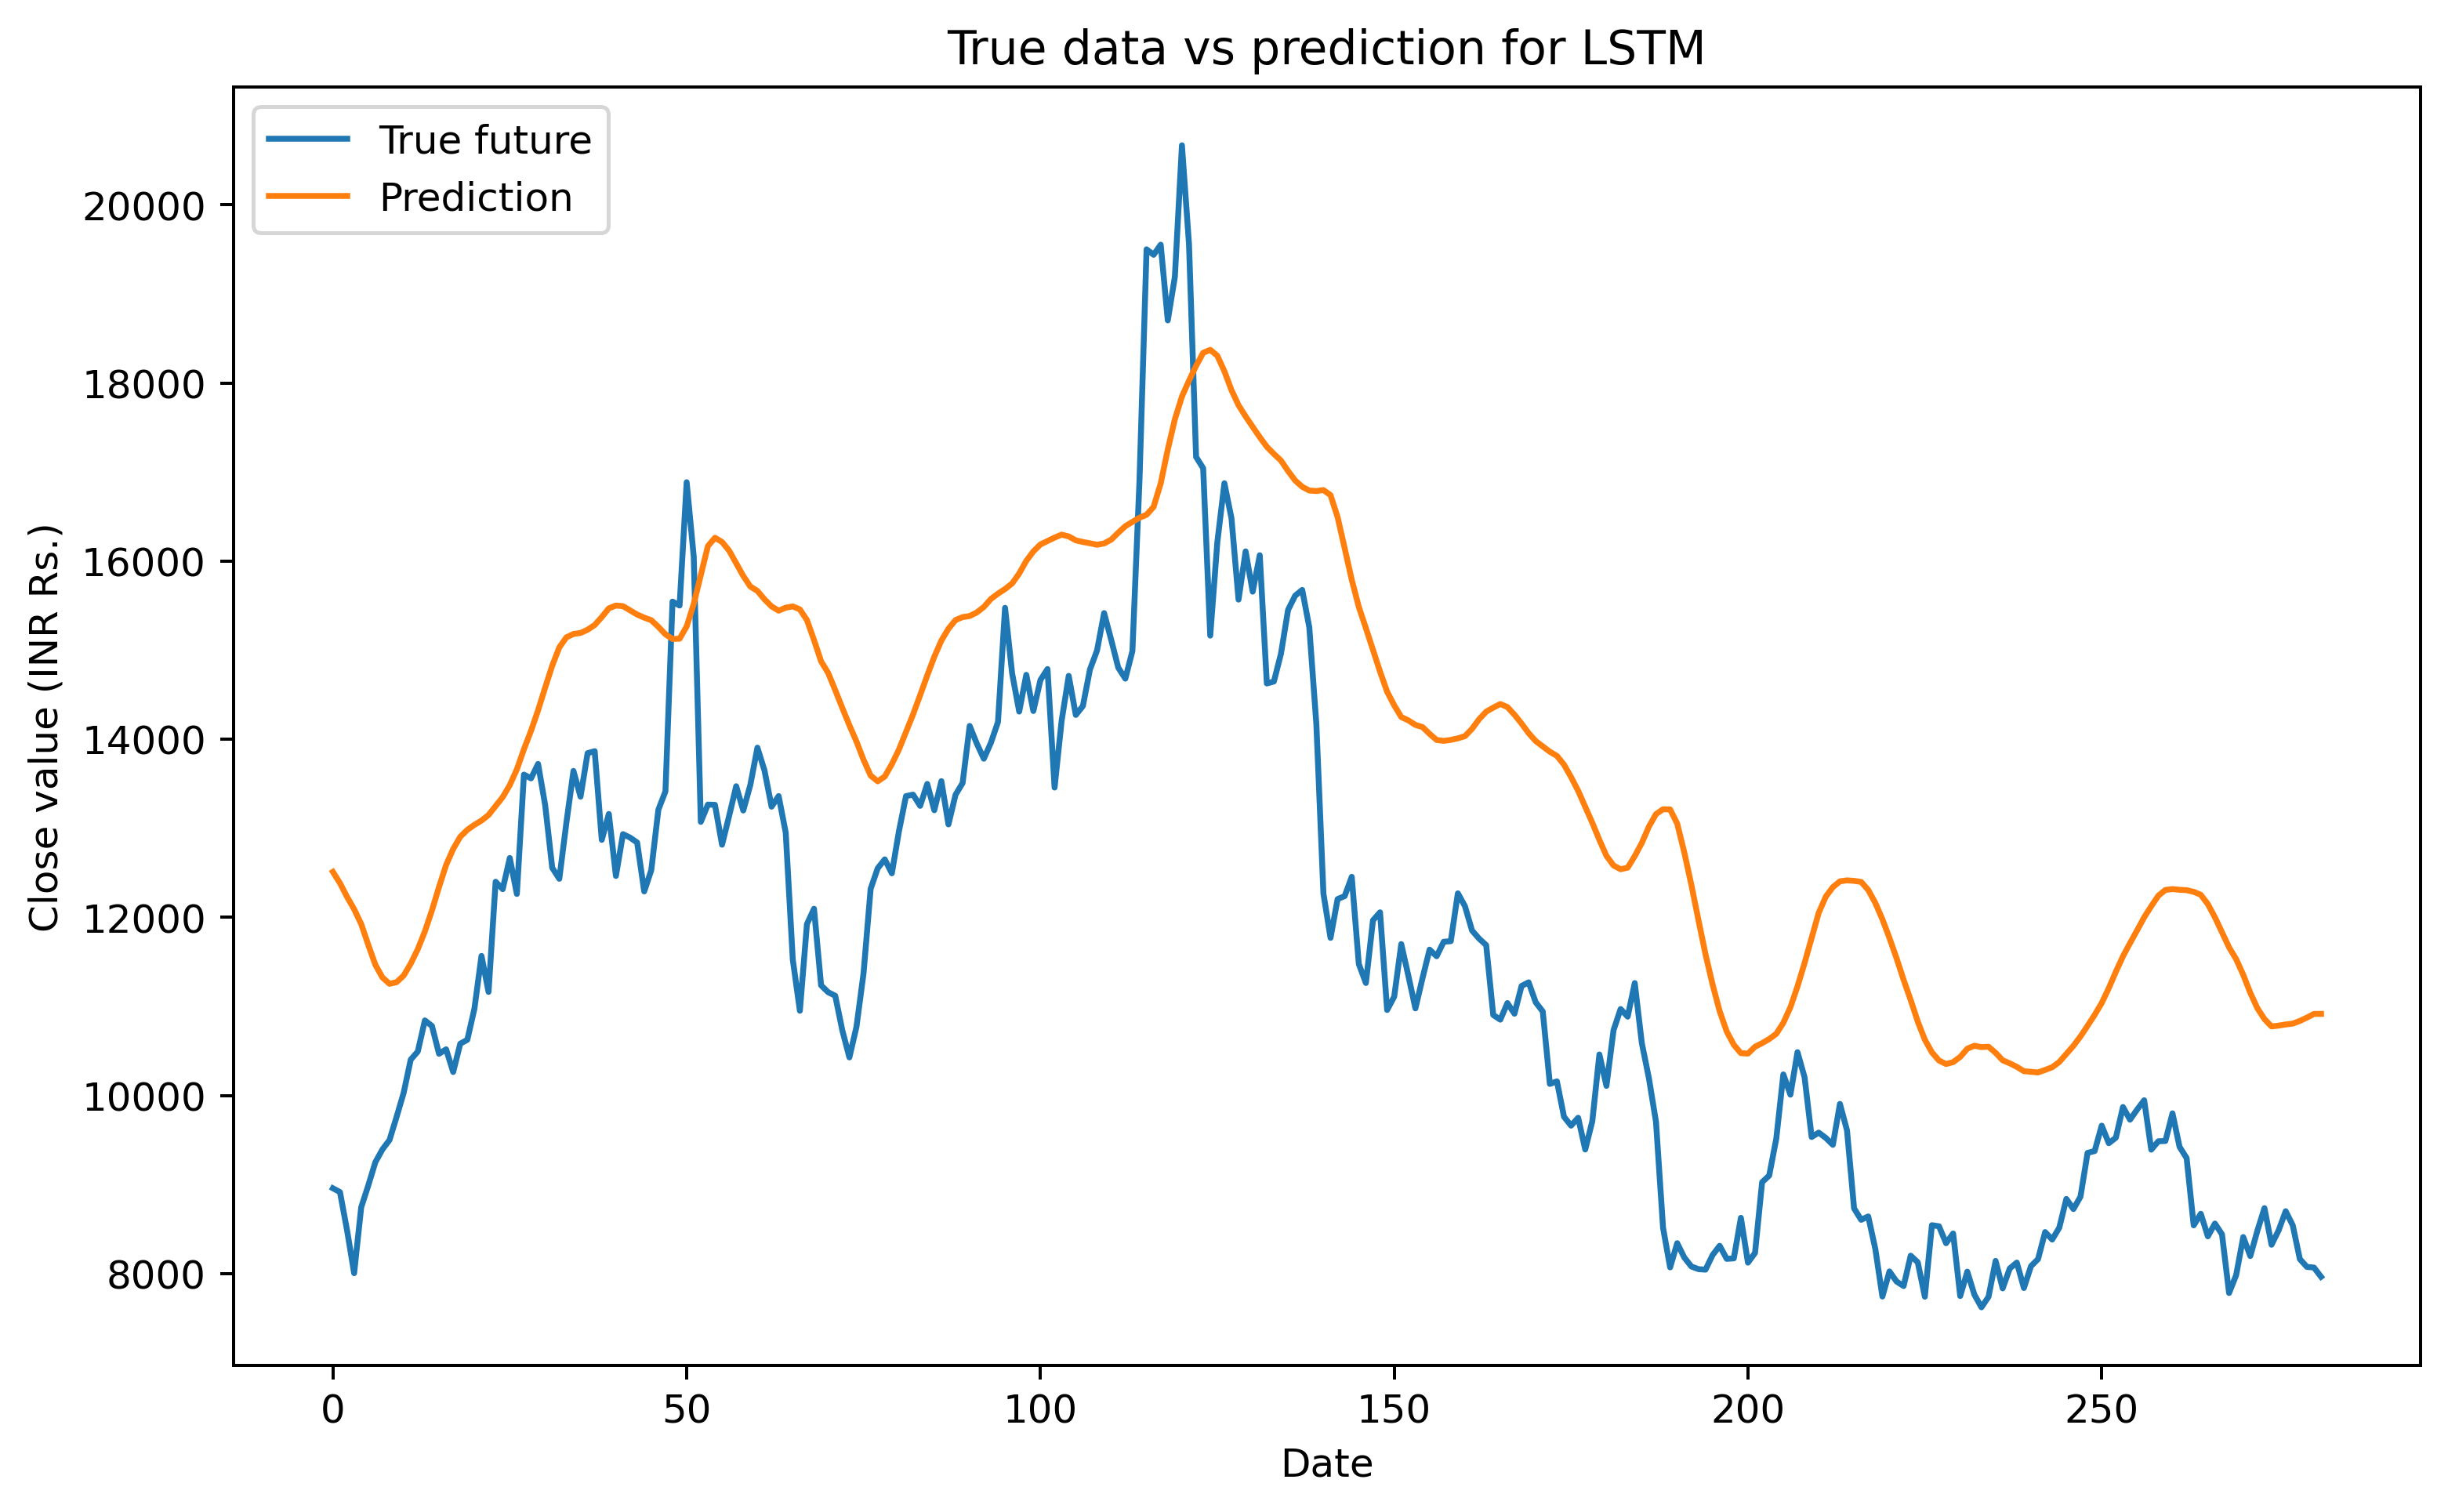

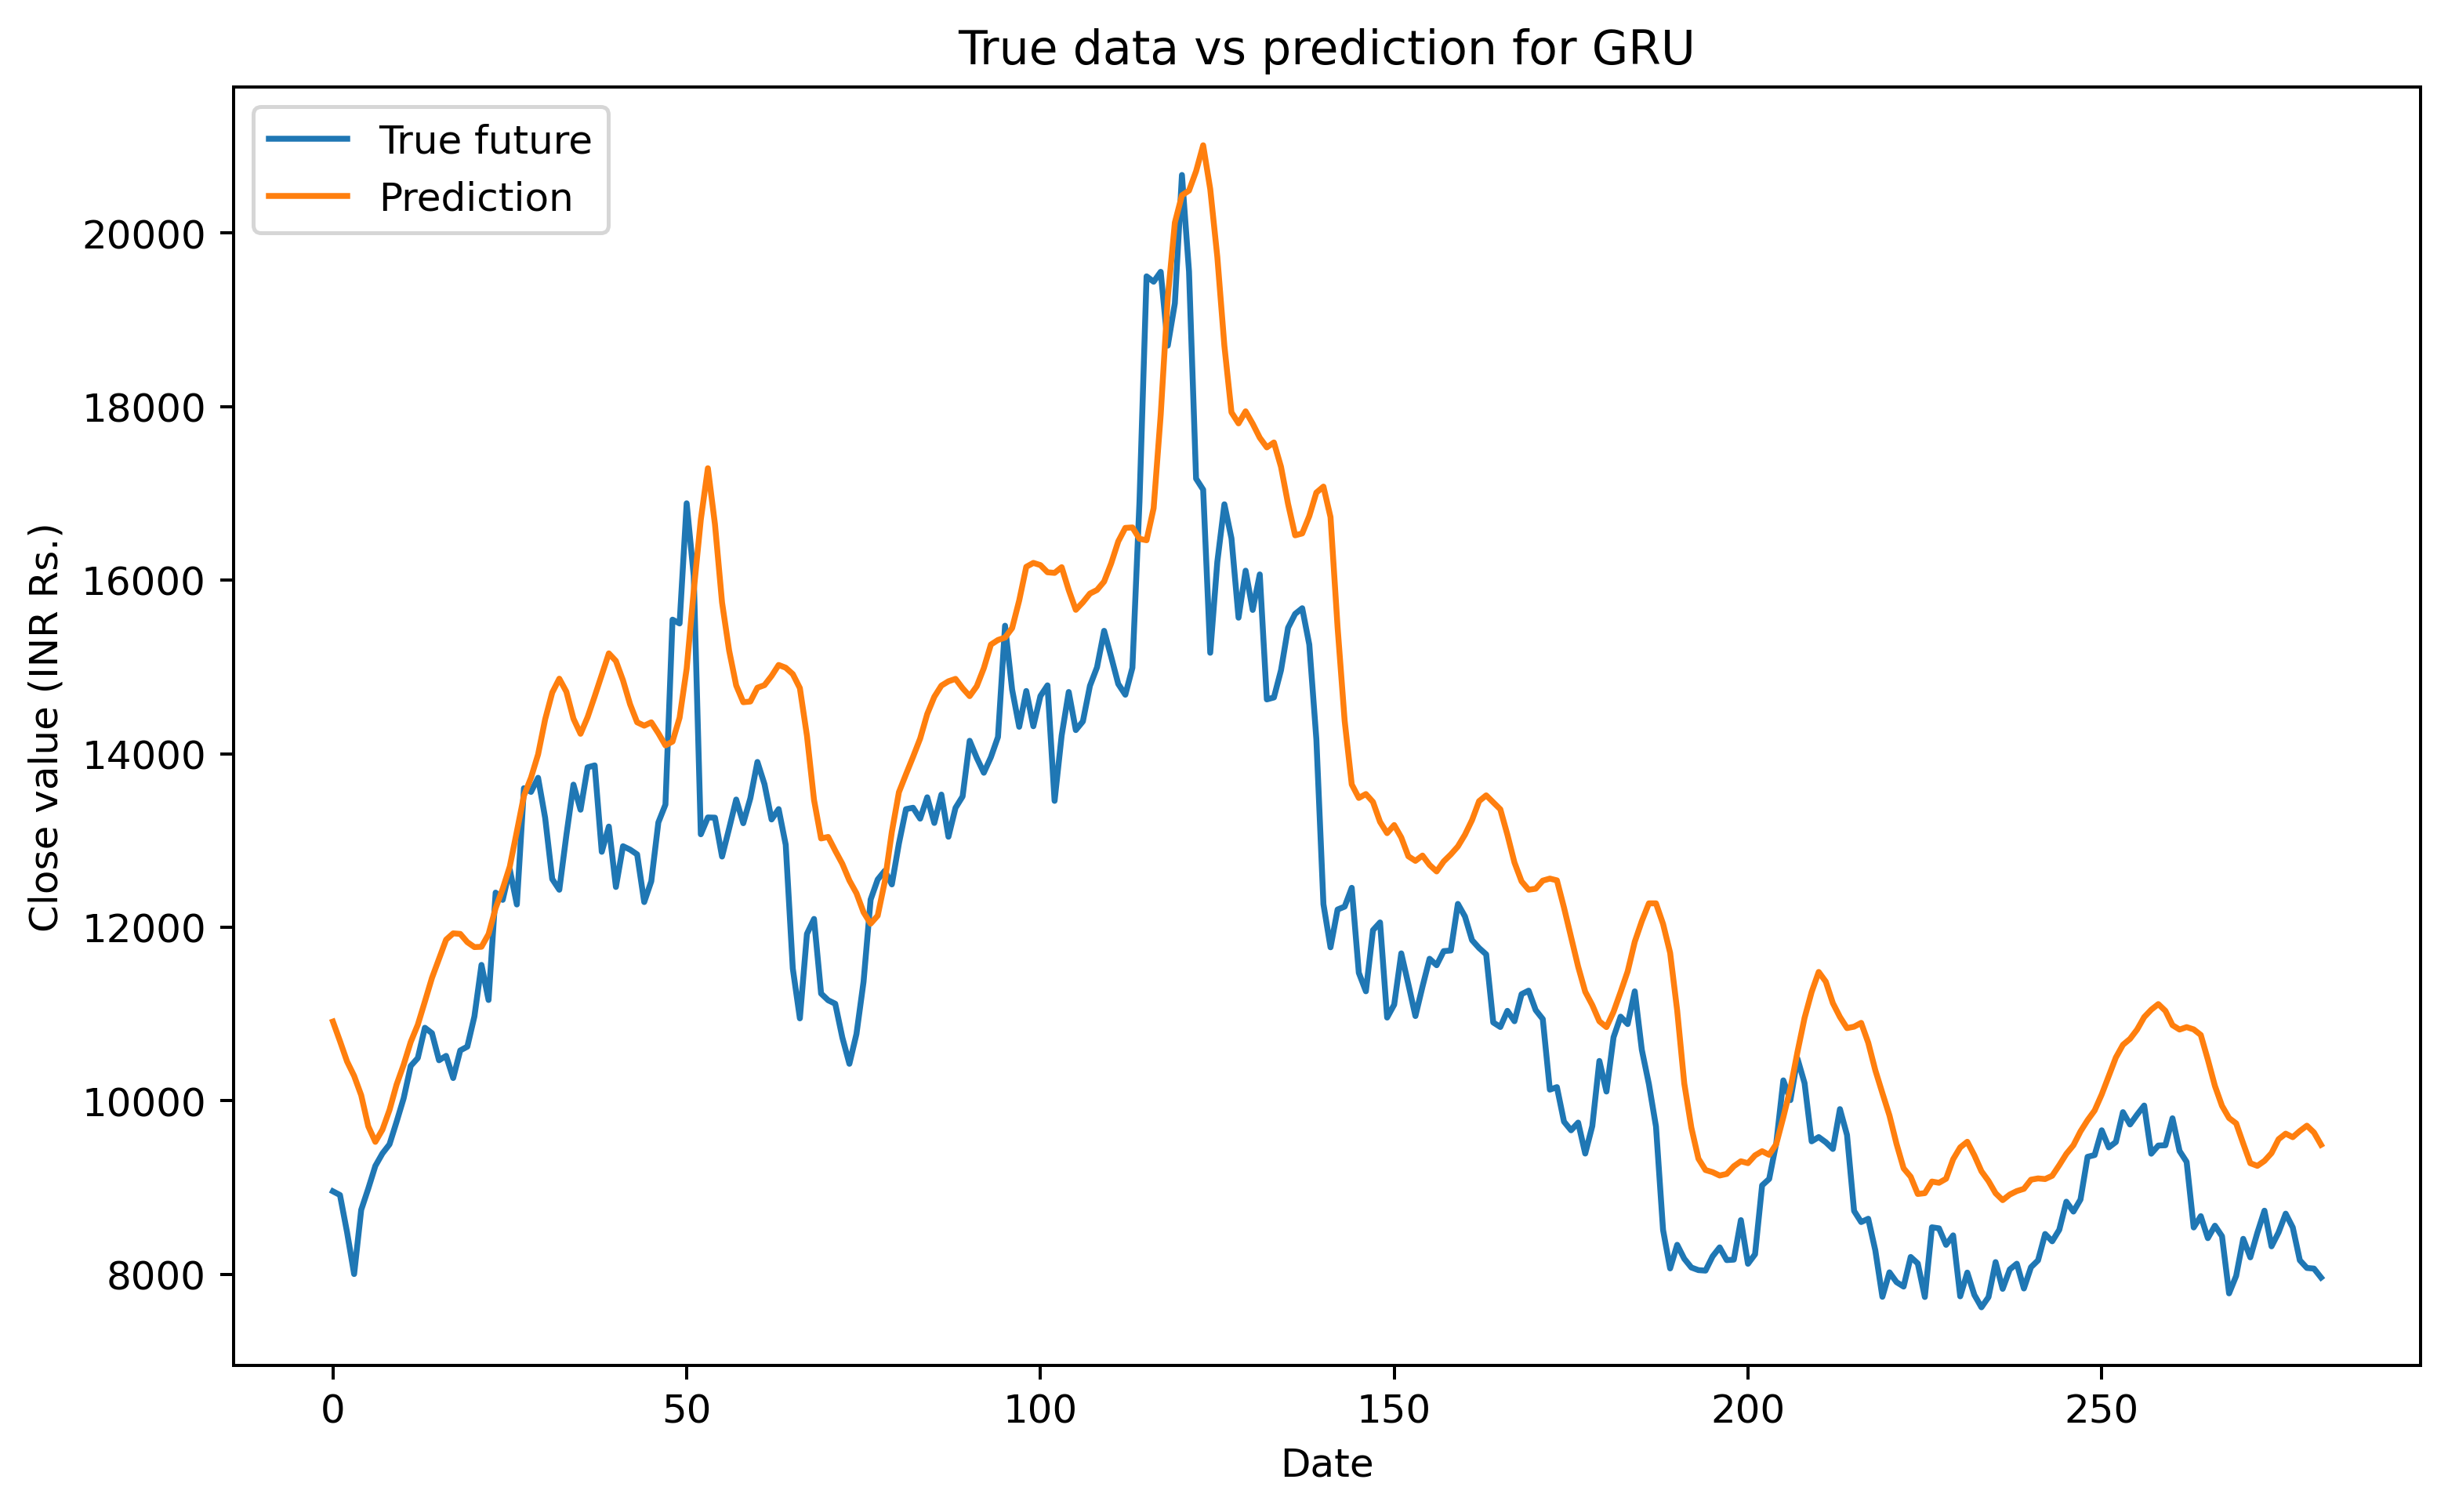

In [60]:
def plot_future(prediction, model_name, y_test):
    
    plt.figure(figsize=(10, 6))
    plt.rcParams['figure.dpi'] = 360
    range_future = len(prediction)

    plt.plot(np.arange(range_future), np.array(y_test), label='True future')
    plt.plot(np.arange(range_future), np.array(prediction),label='Prediction')

    plt.title('True data vs prediction for ' + model_name)
    plt.legend(loc='upper left')
    plt.xlabel('Date')
    plt.ylabel('Close value (INR Rs.)')
   
    
plot_future(pred_bilstm, 'BiLSTM', y_test)
plot_future(pred_lstm, 'LSTM', y_test)
plot_future(pred_gru, 'GRU', y_test)

#  Calculate MAE and MAPE

In [61]:
def evaluate_pred(pred, actual, model_name): 
    errors = pred - actual 
    mae = mean_absolute_error(actual,pred) 
    mape = mean_absolute_percentage_error(actual,pred)
    
    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Mean Absolute Percentage Error: {:.4f}'.format(mape))
    print('')
    
evaluate_pred(pred_bilstm, y_test, 'Bidirectional LSTM')
evaluate_pred(pred_lstm, y_test, 'LSTM')
evaluate_pred(pred_gru, y_test, 'GRU')

Bidirectional LSTM:
Mean Absolute Error: 1304.1788
Mean Absolute Percentage Error: 0.1159

LSTM:
Mean Absolute Error: 2360.7280
Mean Absolute Percentage Error: 0.2272

GRU:
Mean Absolute Error: 1424.2828
Mean Absolute Percentage Error: 0.1296



#  Forcasting 

In [62]:
if crypto == 'BAT'or crypto == 'Basic Authentication Token': 
    newinput = pd.read_csv(r"D:\6 sem\Minor PRoject - 3\BAT-INR.csv", parse_dates=['Date'], index_col = 'Date')

elif crypto == 'Bitcoin' or crypto == 'BTC':
    newinput = pd.read_csv(r"D:\6 sem\Minor PRoject - 3\BTC-INR.csv", parse_dates=['Date'], index_col = 'Date')

elif crypto == 'Litecoin'or crypto == 'LTC': 
    newinput = pd.read_csv(r"D:\6 sem\Minor PRoject - 3\LTC-INR.csv", parse_dates=['Date'], index_col = 'Date')

elif crypto == 'ETC' or crypto == 'Ethereum':
    newinput = pd.read_csv(r"D:\6 sem\Minor PRoject - 3\ETC-INR.csv", parse_dates=['Date'], index_col = 'Date')

else:
    print('You can only check prediction for only four cryptocurrencies (BTC, BAT, LTC, and ETC) for now')

# Order of the variable are important
X_new = newinput.loc['2020-04-24':'2022-04-24',:] 
X_new

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-24,3267.357178,3453.421631,3263.935791,3419.843994,3419.843994,365303793975
2020-04-25,3420.206787,3483.746338,3385.536133,3411.837158,3411.837158,363949529900
2020-04-26,3412.219238,3458.602539,3380.233887,3408.950684,3408.950684,357597992713
2020-04-27,3408.061523,3464.648193,3342.229004,3406.316650,3406.316650,340839165282
2020-04-28,3408.458008,3522.198242,3368.484131,3501.481689,3501.481689,335740664879
...,...,...,...,...,...,...
2022-04-20,8700.664063,8688.542969,8467.331055,8541.414063,8541.414063,51058870819
2022-04-21,8541.081055,8699.921875,8109.203613,8163.074219,8163.074219,57006820424
2022-04-22,8162.990234,8272.390625,8070.445801,8074.614746,8074.614746,51085178778


For which model you wnat to see prediction?
GRU


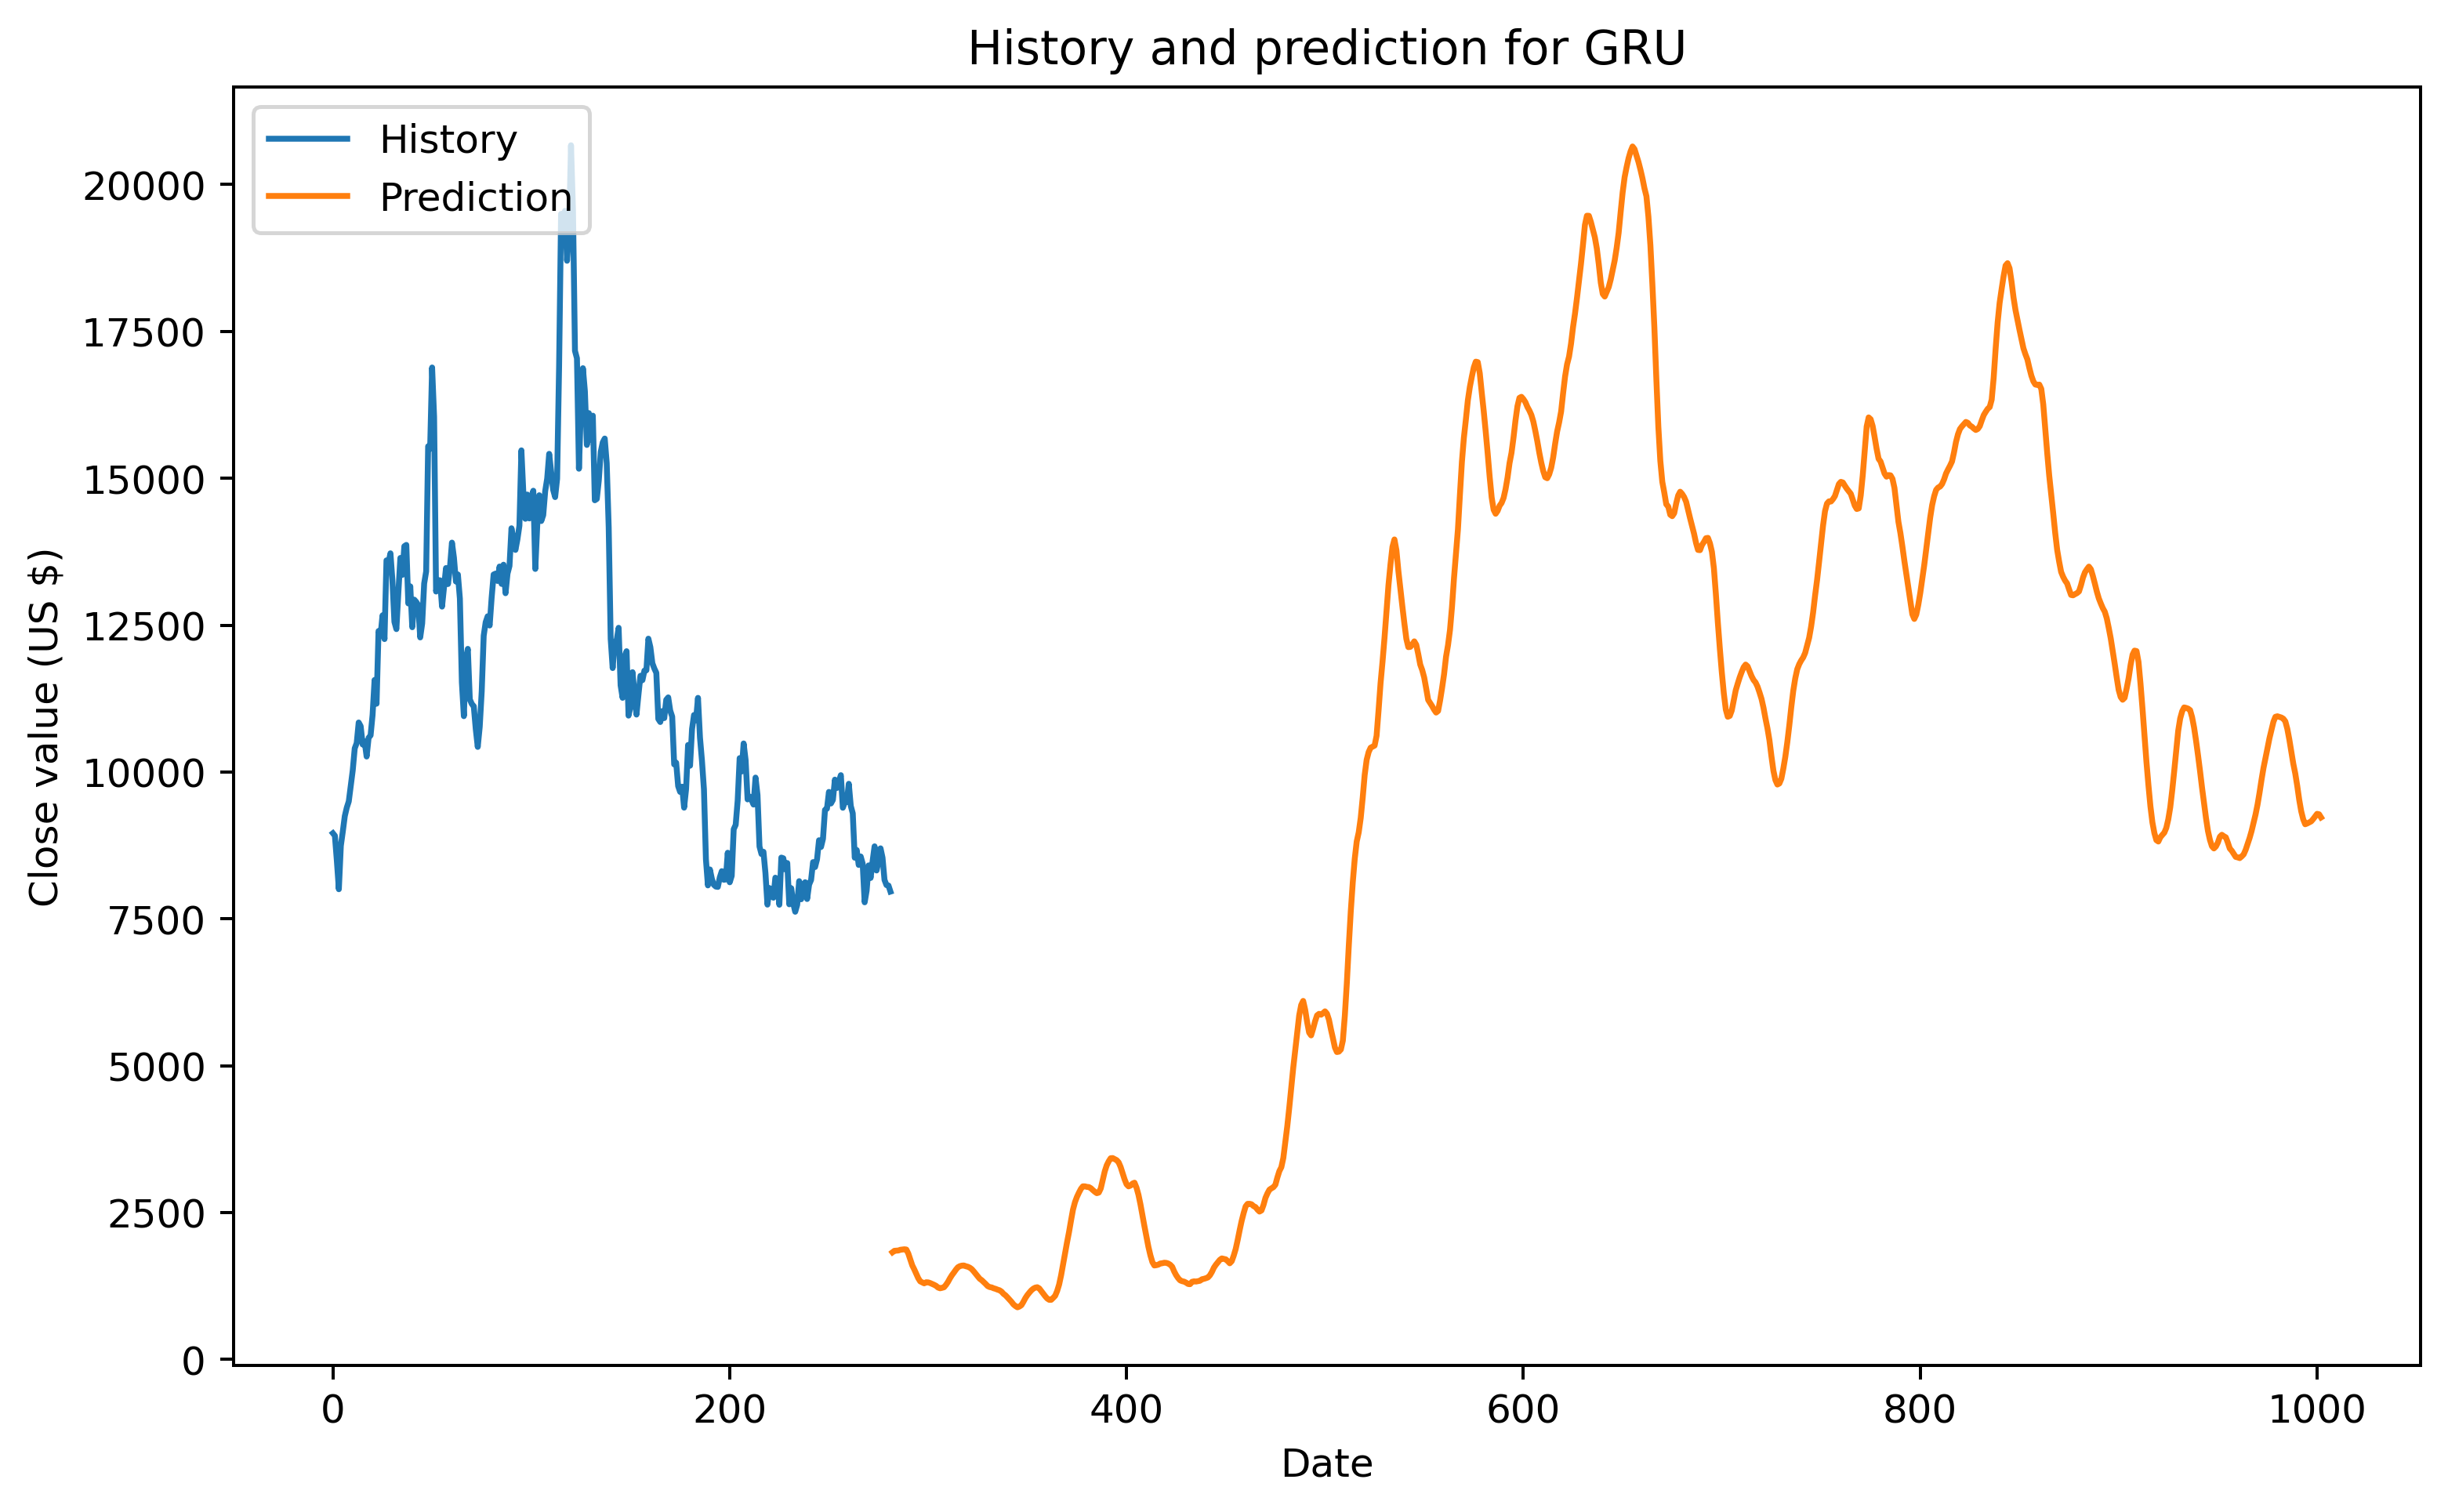

In [33]:
def plot_history_future(y_train, prediction, model_name):
    
    plt.figure(figsize=(10, 6))
    
    range_history = len(y_train)
    range_future = list(range(range_history, range_history + len(prediction)))

    plt.plot(np.arange(range_history), np.array(y_train), label='History')
    plt.plot(range_future, np.array(prediction),label='Prediction')

    plt.title('History and prediction for ' + model_name)
    plt.legend(loc='upper left')
    plt.xlabel('Date')
    plt.ylabel('Close value (US $)')

def forecast(X_input, time_steps):
    # Scale the forecast input with the scaler fit on the training data
    X = input_scaler.transform(X_input)
    
    # Reshape forecast data as 3D input
    Xs = []
    for i in range(len(X) - time_steps):
        v = X[i:i+time_steps, :]
        Xs.append(v)
        
    X_transformed = np.array(Xs)

    # Make prediction for forecast data using lstm model 
    prediction = model_lstm.predict(X_transformed)
    prediction_actual = scaler_y.inverse_transform(prediction)
    return prediction_actual

prediction = forecast(X_new, TIME_STEPS)
print('For which model you wnat to see prediction?')
m = input()
plot_history_future(y_test, prediction,m)